In this notebook, we reproduce de expresions for the coefficients $C_i$, $C_{ij}$ from [Hong2024](https://arxiv.org/pdf/2312.11427) equation (A5)

In [113]:
from sympy import symbols, init_printing, Eq, S, solve, factor, simplify, Function, Matrix, Mul
init_printing()

In [2]:
ma, mb, q, M0, M1, M2 = symbols('m_a, m_b, q, M0, M1, M2', positive=True)
B1_0, B2_0, B12_0, B12_1, C0, C1, C2, C00, C11, C12, C22 = symbols(
    '{{B^{(1)}_{0}}}, {{B^{(2)}_{0}}}, {{B^{(12)}_{0}}}, {{B^{(12)}_{1}}}, C_0, C_1, C_2, C_{00}, C_{11}, C_{12}, C_{22}'
)
A0 = Function('A_0')
B1_0, B2_0, B1_1, B2_1, B12_0, B12_1 = symbols(
    '{{B^{(1)}_{0}}}, {{B^{(2)}_{0}}}, {{B^{(1)}_{1}}}, {{B^{(2)}_{1}}}, {{B^{(12)}_{0}}}, {{B^{(12)}_{1}}}'
)
f1, f2 = symbols('f_1, f_2', real=True)

# Coefficients $C_i$

In [54]:
mabq2 = symbols('m_{abq}', real=True) #ma**2 + mb**2 - q**2
eq1 = Eq(
    2*ma**2*C1 + mabq2*C2,
    -f1*C0 - B12_0 + B2_0
)
eq2 = Eq(
    2*mb**2*C2 + mabq2*C1, 
    -f2*C0 - B12_0 + B1_0
)
display(eq1)
eq2

In [55]:
sols_C1C2 = solve([eq1, eq2], [C1, C2], dict=True)[0]

In [56]:
# sols_C1C2[C1].expand().collect([C0, B1_0, B2_0, B12_0], simplify).simplify()
sols_C1C2[C1] = sols_C1C2[C1].expand().collect(mabq2, simplify).simplify()


In [57]:
sols_C1C2[C2] = sols_C1C2[C2].expand().collect(mabq2, simplify).simplify()

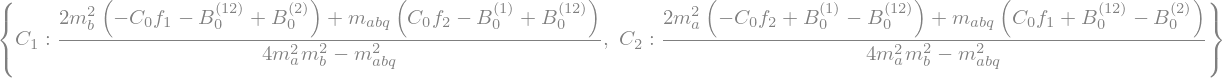

In [58]:
sols_C1C2

with the following assumptions we recover the expression in the case of $l_1 \to l_2 \gamma$ given in equation (A2) from [Hue 2018](https://arxiv.org/pdf/1708.09723)

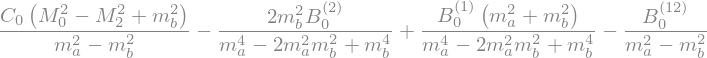

In [59]:
M1, M2 = symbols('M_1, M_2', positive=True)
subs_f2 = {
    f1: M2**2 - M0**2 + ma**2,
    f2: M2**2 - M0**2 + mb**2,
}
solc1 = sols_C1C2[C1].subs(mabq2, ma**2 + mb**2).subs(subs_f2).expand().collect([C0, B1_0, B12_0], simplify)
solc1

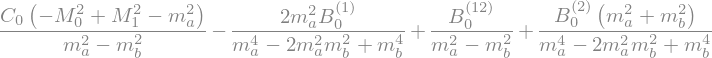

In [60]:
subs_f1 = {
    f1: M1**2 - M0**2 + ma**2,
    f2: M1**2 - M0**2 + mb**2,
}
sols_C1C2[C2].subs(mabq2, ma**2 + mb**2).subs(subs_f1).expand().collect([C0, B1_0, B12_0], simplify)

## Python translation

In [196]:
for ci, exp in sols_C1C2.items():
    print(ci, ' = ', str(exp).replace(
        '{{B^{(12)}_{0}}}', 'B12_0'
    ).replace(
        '{{B^{(2)}_{0}}}', 'B2_0'
    ).replace(
        '{{B^{(1)}_{0}}}', 'B1_0'
    ).replace(
        'm_{abq}', 'mabq'
    ).replace(
        'C_0', 'C0'
    ).replace(
        'f_1', 'f1'
    ).replace(
        'f_2', 'f2'
    ).replace(
        'm_a', 'ma'
    ).replace(
        'm_b', 'mb'
    )
    )

C_1  =  (2*mb**2*(-C0*f1 - B12_0 + B2_0) + mabq*(C0*f2 - B1_0 + B12_0))/(4*ma**2*mb**2 - mabq**2)
C_2  =  (2*ma**2*(-C0*f2 + B1_0 - B12_0) + mabq*(C0*f1 + B12_0 - B2_0))/(4*ma**2*mb**2 - mabq**2)


# Coefficients $C_{ij}$

In [3]:
D = symbols('D')
p12 = symbols('p_{12}', positive=True) # (q**2 - ma**2 - mb**2)/2
qa1, qb2 = symbols('q_{a1}, q_{b2}')

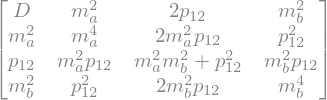

In [4]:
G4 = Matrix(
    [
        [D, ma**2, 2*p12, mb**2],
        [ma**2, ma**4, 2*ma**2*p12, p12**2],
        [p12, ma**2*p12, ma**2*mb**2 + p12**2, mb**2*p12],
        [mb**2, p12**2, 2*mb**2*p12, mb**4]
    ]
)
G4

In [5]:
G4_det = G4.det()

In [6]:
G4_det = G4_det.collect(p12, factor).factor()
G4_det

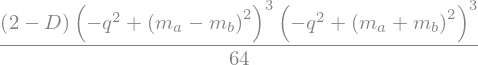

In [7]:
G4_det.subs(p12, (q**2 - ma**2 - mb**2)/2).simplify().subs(
    ma**2 - 2*ma*mb + mb**2, (ma - mb)**2
    ).subs(ma**2 + 2*ma*mb + mb**2, (ma + mb)**2)

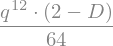

In [8]:
G4_det.subs(p12, (q**2 - ma**2 - mb**2)/2).simplify().subs(
    ma**2 - 2*ma*mb + mb**2, (ma - mb)**2
    ).subs(ma**2 + 2*ma*mb + mb**2, (ma + mb)**2).subs({ma:0, mb:0})

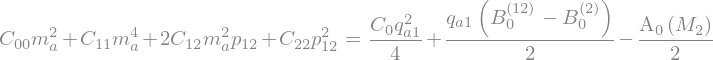

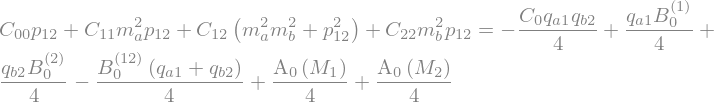

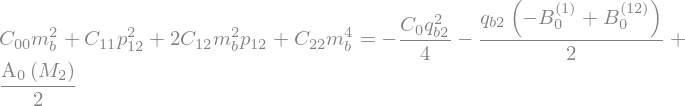

In [9]:
Eq1 = Eq(
    D*C00 + ma**2*C11 + mb**2*C22 + 2*p12*C12,
    B12_0 + M0**2*C0
)
display(Eq1)
Eq2 = Eq(
    ma**2*C00 + ma**4*C11 + p12**2*C22 + 2*ma**2*p12*C12,
    (qa1**2*C0 + 2*qa1*(B12_0 - B2_0) - 2*A0(M2))/4
)
display(Eq2)
Eq3 = Eq(
    p12*C00 + ma**2*p12*C11 + p12*mb**2*C22 + (ma**2*mb**2 + p12**2)*C12,
    -(
        qa1*qb2*C0 + (qa1 + qb2)*B12_0 - qa1*B1_0 - qb2*B2_0 - A0(M1) - A0(M2)
    )/4
)
display(Eq3)
Eq4 = Eq(
    mb**2*C00 + p12**2*C11 + mb**4*C22 + 2*mb**2*p12*C12,
    -(
        qb2**2*C0 + 2*qb2*(B12_0 - B1_0) - 2*A0(M2)
    )/4
)
display(Eq4)


In [10]:
sols_Cij = solve([Eq1, Eq2, Eq3, Eq4], [C00, C11, C12, C22], dict=True)[0]

### $C_{00}$

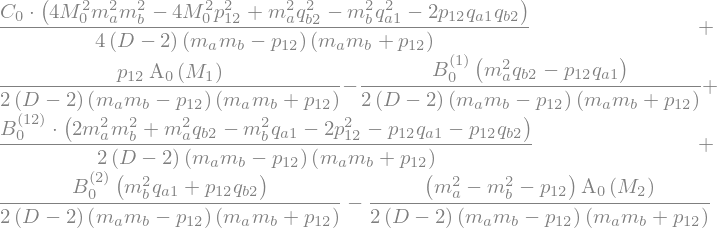

In [65]:
c00 = sols_Cij[C00].expand().collect(
    [C0, B12_0, B2_0, B1_0, A0(M1), A0(M2)], lambda x:x.collect([D, p12, qa1, qb2], factor).factor()
    )
c00

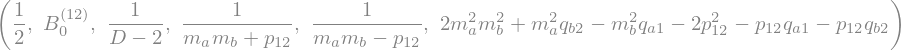

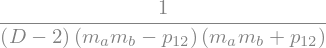

In [69]:
c00_args0 = c00.args[0].args
display(c00_args0)
c00_den = c00_args0[2]*c00_args0[3]*c00_args0[4]
c00_den

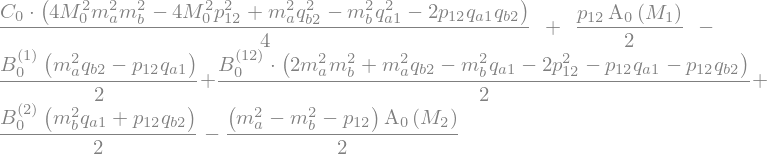

In [82]:
c00_num = (c00*(1/c00_den)).expand().collect(
    [C0, B12_0, B2_0, B1_0, A0(M1), A0(M2)], factor
    )
c00_num

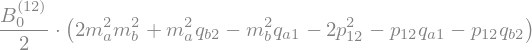

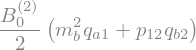

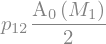

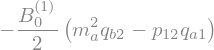

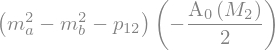

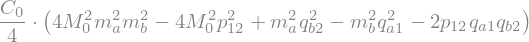

In [117]:
c00_num_coeff = c00_num.collect(
    [C0, B12_0, B2_0, B1_0, A0(M1), A0(M2)], evaluate=False
    )
for pave, coeff in c00_num_coeff.items():
    coeff = coeff.factor()
    coeff_args = coeff.args
    frac = coeff_args[0]
    exp_coeff = coeff_args[1].simplify()
    display(Mul(frac*pave, exp_coeff, evaluate=False))

In [151]:
def write_python_pave_expresion(num_coeff, den):
    str_num = []
    for pave, coeff in num_coeff.items():
        coeff = coeff.factor()
        coeff_args = coeff.args
        frac = coeff_args[0]
        exp_coeff = coeff_args[1].simplify()
        exp = Mul(frac*pave, exp_coeff, evaluate=False)
        # display(exp)
        str_numi = str(exp).replace(
        '{{B^{(12)}_{0}}}', 'B12_0(mX, M1, M2)'
        ).replace(
            '{{B^{(2)}_{0}}}', 'B2_0(mb, M0, M2)'
        ).replace(
            '{{B^{(1)}_{0}}}', 'B1_0(ma, M0, M1)'
        ).replace(
            'C_0', 'C0(*args)'
        ).replace(
            'A_0', 'A0'
        ).replace(
            'p_{12}', 'p12'
        ).replace(
            'q_{a1}', 'qa1'
        ).replace(
            'q_{b2}', 'qb2'
        ).replace(
            'm_a', 'ma'
        ).replace(
            'm_b', 'mb'
        )
        str_num.append(str_numi)
    str_num = '\n\t+'.join(str_num)
    str_den = str(den).replace(
        'm_a', 'ma'
        ).replace(
            'm_b', 'mb'
        ).replace(
            'p_{12}', 'p12'
        )
    final_exp_str = f'''{str_den}*(
        {str_num}
    )'''
    print(final_exp_str)

In [152]:
write_python_pave_expresion(c00_num_coeff, c00_den)

1/((D - 2)*(ma*mb - p12)*(ma*mb + p12))*(
        (B12_0(mX, M1, M2)/2)*(2*ma**2*mb**2 + ma**2*qb2 - mb**2*qa1 - 2*p12**2 - p12*qa1 - p12*qb2)
	+(B2_0(mb, M0, M2)/2)*(mb**2*qa1 + p12*qb2)
	+p12*(A0(M1)/2)
	+(-B1_0(ma, M0, M1)/2)*(ma**2*qb2 - p12*qa1)
	+(ma**2 - mb**2 - p12)*(-A0(M2)/2)
	+(C0(*args)/4)*(4*M0**2*ma**2*mb**2 - 4*M0**2*p12**2 + ma**2*qb2**2 - mb**2*qa1**2 - 2*p12*qa1*qb2)
    )


### $C_{11}$

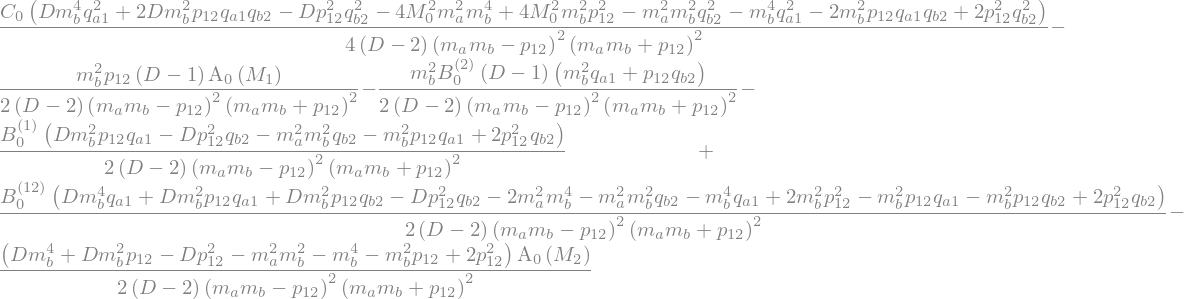

In [75]:
c11 = sols_Cij[C11].expand().collect(
    [C0, B12_0, B2_0, B1_0, A0(M1), A0(M2)], lambda x:x.collect([D, p12, qa1, qb2], factor).factor()
    )
c11

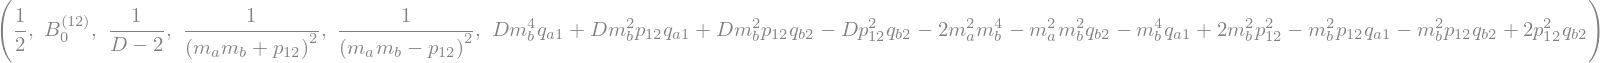

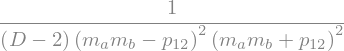

In [84]:
c11_args0 = c11.args[0].args
display(c11_args0)
c11_den = c11_args0[2]*c11_args0[3]*c11_args0[4]
c11_den

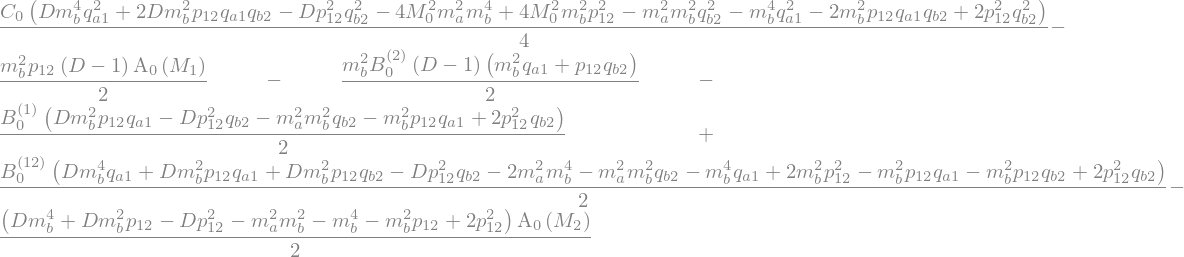

In [88]:
c11_num = (c11*(1/c11_den)).expand().collect(
    [C0, B12_0, B2_0, B1_0, A0(M1), A0(M2)], factor
    )
c11_num

In [122]:
c11_num_coeff = c11_num.collect(
    [C0, B12_0, B2_0, B1_0, A0(M1), A0(M2)], evaluate=False
    )
#for pave, coeff in c11_num_coeff.items():
#    coeff = coeff.factor()
#    coeff_args = coeff.args
#    frac = coeff_args[0]
#    exp_coeff = coeff_args[1].simplify()
#    display(Mul(frac, exp_coeff*pave, evaluate=False))

### $C_{12}$

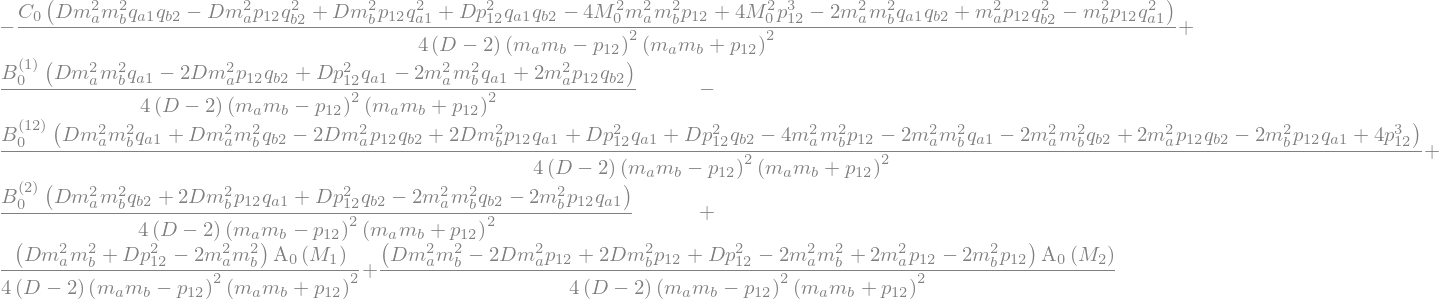

In [89]:
c12 = sols_Cij[C12].expand().collect(
    [C0, B12_0, B2_0, B1_0, A0(M1), A0(M2)], lambda x:x.collect([p12], factor).factor()
    )
c12

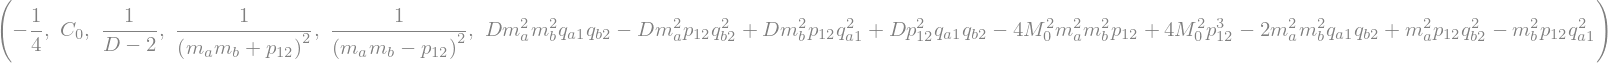

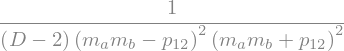

In [90]:
c12_args0 = c12.args[0].args
display(c12_args0)
c12_den = c12_args0[2]*c12_args0[3]*c12_args0[4]
c12_den

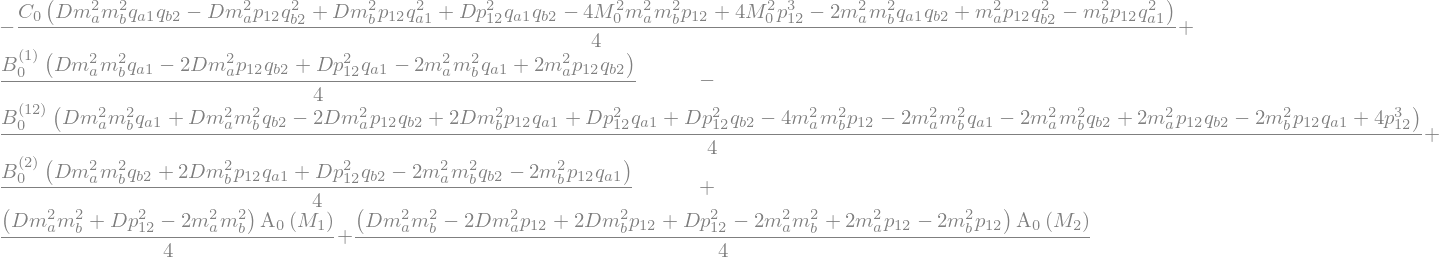

In [123]:
c12_num = (c12*(1/c12_den)).expand().collect(
    [C0, B12_0, B2_0, B1_0, A0(M1), A0(M2)], factor
    )
c12_num

In [124]:
c12_num_coeff = c12_num.collect(
    [C0, B12_0, B2_0, B1_0, A0(M1), A0(M2)], evaluate=False
    )

### $C_{22}$

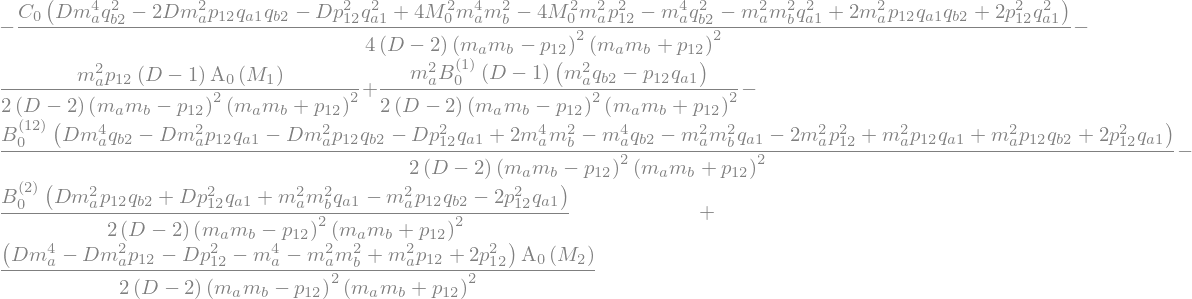

In [37]:
c22 = sols_Cij[C22].expand().collect(
    [C0, B12_0, B2_0, B1_0, A0(M1), A0(M2)], lambda x:x.collect([p12, qa1, qb2], simplify).factor()
    )
c22

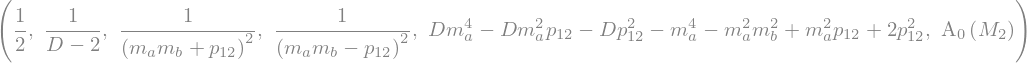

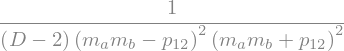

In [127]:
c22_args0 = c22.args[0].args
display(c22_args0)
c22_den = c22_args0[1]*c22_args0[2]*c22_args0[3]
c22_den

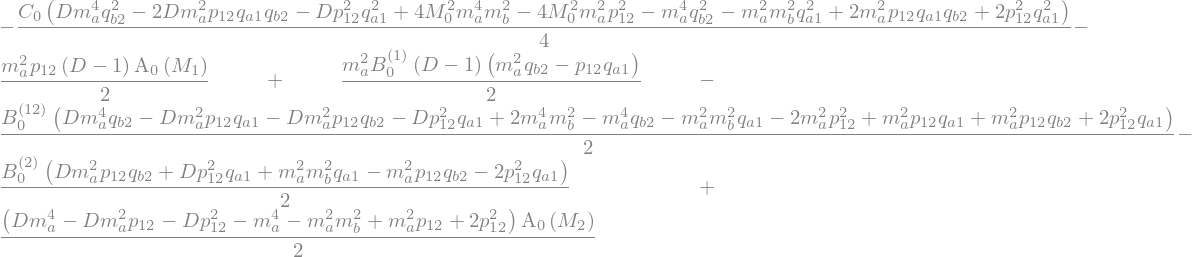

In [128]:
c22_num = (c22*(1/c22_den)).expand().collect(
    [C0, B12_0, B2_0, B1_0, A0(M1), A0(M2)], factor
    )
c22_num

In [129]:
c22_num_coeff = c22_num.collect(
    [C0, B12_0, B2_0, B1_0, A0(M1), A0(M2)], evaluate=False
    )

### Limite $m_a = 0$ $m_b = 0$

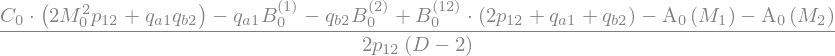

In [15]:
c00.subs(ma,0).subs(mb,0).simplify()

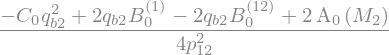

In [16]:
c11.subs(ma,0).subs(mb,0).simplify()

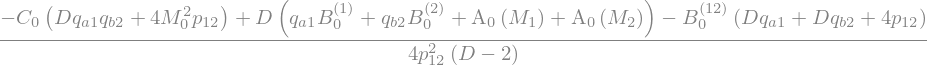

In [17]:
c12.subs(ma,0).subs(mb,0).simplify()

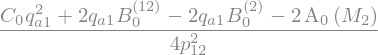

In [18]:
c22.subs(ma,0).subs(mb,0).simplify()

## Python translation

## $C_{00}$

In [153]:
write_python_pave_expresion(c00_num_coeff, c00_den)

1/((D - 2)*(ma*mb - p12)*(ma*mb + p12))*(
        (B12_0(mX, M1, M2)/2)*(2*ma**2*mb**2 + ma**2*qb2 - mb**2*qa1 - 2*p12**2 - p12*qa1 - p12*qb2)
	+(B2_0(mb, M0, M2)/2)*(mb**2*qa1 + p12*qb2)
	+p12*(A0(M1)/2)
	+(-B1_0(ma, M0, M1)/2)*(ma**2*qb2 - p12*qa1)
	+(ma**2 - mb**2 - p12)*(-A0(M2)/2)
	+(C0(*args)/4)*(4*M0**2*ma**2*mb**2 - 4*M0**2*p12**2 + ma**2*qb2**2 - mb**2*qa1**2 - 2*p12*qa1*qb2)
    )


## $C_{11}$

In [154]:
write_python_pave_expresion(c11_num_coeff, c11_den)

1/((D - 2)*(ma*mb - p12)**2*(ma*mb + p12)**2)*(
        (B12_0(mX, M1, M2)/2)*(D*mb**4*qa1 + D*mb**2*p12*qa1 + D*mb**2*p12*qb2 - D*p12**2*qb2 - 2*ma**2*mb**4 - ma**2*mb**2*qb2 - mb**4*qa1 + 2*mb**2*p12**2 - mb**2*p12*qa1 - mb**2*p12*qb2 + 2*p12**2*qb2)
	+(-B1_0(ma, M0, M1)/2)*(D*mb**2*p12*qa1 - D*p12**2*qb2 - ma**2*mb**2*qb2 - mb**2*p12*qa1 + 2*p12**2*qb2)
	+(D*mb**4 + D*mb**2*p12 - D*p12**2 - ma**2*mb**2 - mb**4 - mb**2*p12 + 2*p12**2)*(-A0(M2)/2)
	+(C0(*args)/4)*(D*mb**4*qa1**2 + 2*D*mb**2*p12*qa1*qb2 - D*p12**2*qb2**2 - 4*M0**2*ma**2*mb**4 + 4*M0**2*mb**2*p12**2 - ma**2*mb**2*qb2**2 - mb**4*qa1**2 - 2*mb**2*p12*qa1*qb2 + 2*p12**2*qb2**2)
	+mb**2*(-B2_0(mb, M0, M2)/2)
	+p12*(-A0(M1)/2)
    )


## $C_{12}$

In [155]:
write_python_pave_expresion(c12_num_coeff, c12_den)

1/((D - 2)*(ma*mb - p12)**2*(ma*mb + p12)**2)*(
        (-C0(*args)/4)*(D*ma**2*mb**2*qa1*qb2 - D*ma**2*p12*qb2**2 + D*mb**2*p12*qa1**2 + D*p12**2*qa1*qb2 - 4*M0**2*ma**2*mb**2*p12 + 4*M0**2*p12**3 - 2*ma**2*mb**2*qa1*qb2 + ma**2*p12*qb2**2 - mb**2*p12*qa1**2)
	+(-B12_0(mX, M1, M2)/4)*(D*ma**2*mb**2*qa1 + D*ma**2*mb**2*qb2 - 2*D*ma**2*p12*qb2 + 2*D*mb**2*p12*qa1 + D*p12**2*qa1 + D*p12**2*qb2 - 4*ma**2*mb**2*p12 - 2*ma**2*mb**2*qa1 - 2*ma**2*mb**2*qb2 + 2*ma**2*p12*qb2 - 2*mb**2*p12*qa1 + 4*p12**3)
	+(B1_0(ma, M0, M1)/4)*(D*ma**2*mb**2*qa1 - 2*D*ma**2*p12*qb2 + D*p12**2*qa1 - 2*ma**2*mb**2*qa1 + 2*ma**2*p12*qb2)
	+(B2_0(mb, M0, M2)/4)*(D*ma**2*mb**2*qb2 + 2*D*mb**2*p12*qa1 + D*p12**2*qb2 - 2*ma**2*mb**2*qb2 - 2*mb**2*p12*qa1)
	+(D*ma**2*mb**2 + D*p12**2 - 2*ma**2*mb**2)*(A0(M1)/4)
	+(D*ma**2*mb**2 - 2*D*ma**2*p12 + 2*D*mb**2*p12 + D*p12**2 - 2*ma**2*mb**2 + 2*ma**2*p12 - 2*mb**2*p12)*(A0(M2)/4)
    )


## $C_{22}$

In [156]:
write_python_pave_expresion(c22_num_coeff, c22_den)

1/((D - 2)*(ma*mb - p12)**2*(ma*mb + p12)**2)*(
        (D*ma**4 - D*ma**2*p12 - D*p12**2 - ma**4 - ma**2*mb**2 + ma**2*p12 + 2*p12**2)*(A0(M2)/2)
	+(-B12_0(mX, M1, M2)/2)*(D*ma**4*qb2 - D*ma**2*p12*qa1 - D*ma**2*p12*qb2 - D*p12**2*qa1 + 2*ma**4*mb**2 - ma**4*qb2 - ma**2*mb**2*qa1 - 2*ma**2*p12**2 + ma**2*p12*qa1 + ma**2*p12*qb2 + 2*p12**2*qa1)
	+(-B2_0(mb, M0, M2)/2)*(D*ma**2*p12*qb2 + D*p12**2*qa1 + ma**2*mb**2*qa1 - ma**2*p12*qb2 - 2*p12**2*qa1)
	+(-C0(*args)/4)*(D*ma**4*qb2**2 - 2*D*ma**2*p12*qa1*qb2 - D*p12**2*qa1**2 + 4*M0**2*ma**4*mb**2 - 4*M0**2*ma**2*p12**2 - ma**4*qb2**2 - ma**2*mb**2*qa1**2 + 2*ma**2*p12*qa1*qb2 + 2*p12**2*qa1**2)
	+ma**2*(B1_0(ma, M0, M1)/2)
	+p12*(-A0(M1)/2)
    )
